In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Data Grouped by Averaging')

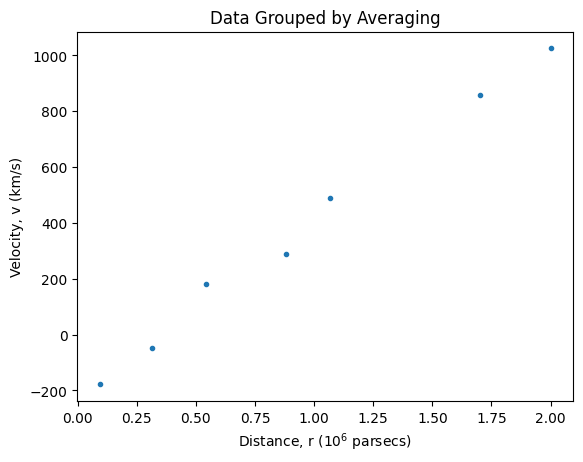

In [7]:
dtype = [('object', 'U20'),  # String column
         ('m_s', 'U4'),      # String column ('..' indicates non-numeric)
         ('r', 'f8'),        # Floating point number
         ('v', 'i4'),        # Integer (signed) for velocity
         ('m_t', 'f8'),      # Floating point number
         ('M_t', 'f8')]      # Floating point number

object, ms, r, v, mt, Mt = np.loadtxt(
    'raw_data_table1.md',
    dtype=dtype,
    skiprows=1,
    unpack=True)

v_min = np.min(v)
v_max = np.max(v)
step_size = (v_max - v_min) / 9

# Create groups for velocities
v_groups = [[] for _ in range(9)]  # Create 9 empty lists for groups

# Assign velocities to appropriate group
for vel in v:
    group_idx = min(int((vel - v_min) // step_size), 8)  # Ensure index is in range 0-8
    v_groups[group_idx].append(vel)

# Compute the average of each group
v_average_values = [np.mean(group) if group else np.nan for group in v_groups]


r_min = np.min(r)
r_max = np.max(r)
step_size = (r_max - r_min) / 9

# Create groups for velocities
r_groups = [[] for _ in range(9)]  # Create 9 empty lists for groups

# Assign velocities to appropriate group
for dist in r:
    group_idx = min(int((dist - r_min) // step_size), 8)  # Ensure index is in range 0-8
    r_groups[group_idx].append(dist)

# Compute the average of each group
r_average_values = [np.mean(group) if group else np.nan for group in r_groups]

# Output the list of average values
plt.plot(r_average_values,v_average_values, '.')
plt.xlabel(r'Distance, r ($10^6$ parsecs)')
plt.ylabel(r'Velocity, v (km/s)')
plt.title('Data Grouped by Averaging')


Text(0.5, 1.0, 'All data from Table One Presented')

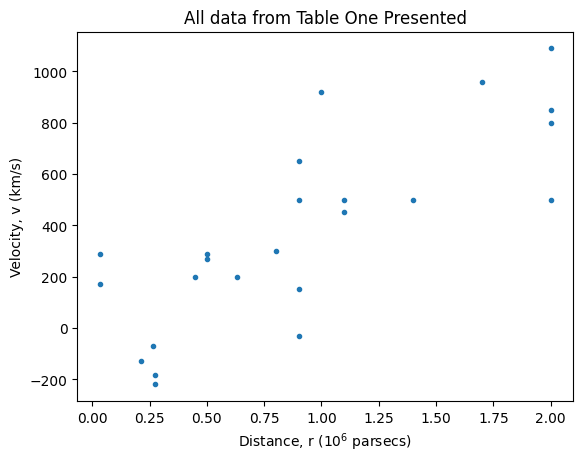

In [8]:
plt.plot(r,v,'.')

plt.xlabel(r'Distance, r ($10^6$ parsecs)')
plt.ylabel(r'Velocity, v (km/s)')
plt.title('All data from Table One Presented')


Text(0.5, 1.0, 'All data from Table 2 Presented')

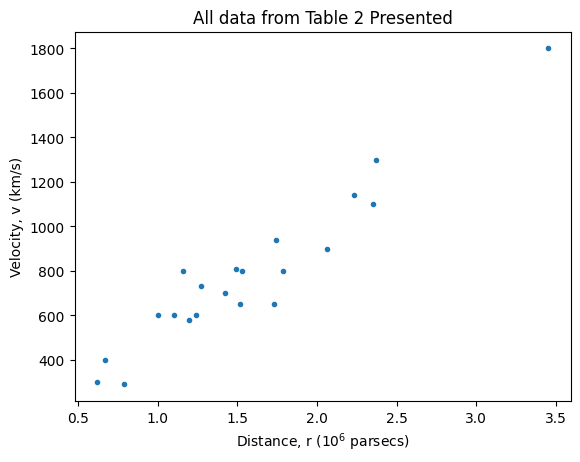

In [9]:
dtype = [('object', 'U20'),  # String column
         ('v', 'i4'),      # Integer (signed) for velocity
         ('vs', 'i4'),        # Integer (signed) for velocity
         ('r', 'f8'),        # Floating point number
         ('mt', 'f8'),      # Floating point number
         ('Mt', 'f8')]      # Floating point number

object, v, vs, r, mt, Mt = np.loadtxt(
    'raw_data_table2.md',
    dtype=dtype,
    skiprows=1,
    unpack=True)

plt.plot(r,v,'.')

plt.xlabel(r'Distance, r ($10^6$ parsecs)')
plt.ylabel(r'Velocity, v (km/s)')
plt.title('All data from Table 2 Presented')
